### **Backpropagation**

**Feed forward**

Feed-forward equations,$$ \mathbf{a}^{(n)} = \sigma(\mathbf{z}^{(n)}) $$$$ \mathbf{z}^{(n)} = \mathbf{W}^{(n)}\mathbf{a}^{(n-1)} + \mathbf{b}^{(n)} $$

We are using logistic function as our activation function, rather than the more familiar $\tanh$.$$ \sigma(\mathbf{z}) = \frac{1}{1 + \exp(-\mathbf{z})} $$



In [1]:
%run "readonly/BackpropModule.ipynb"

ERROR:root:File `'readonly/BackpropModule.ipynb.py'` not found.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Here is the activation function and its derivative.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

# This function initialises the network with it's structure, it also resets any training already done.
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

# This function feeds forward each activation to the next layer. It returns all weighted sums and activations.
def network_function(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

# This is the cost function of a neural network with respect to a training set.
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

### **Backpropagation**
In the next cells, you will be asked to complete functions for the Jacobian of the cost function with respect to the weights and biases. We will start with layer 3, which is the easiest, and work backwards through the layers.

We'll define our Jacobians as,$$ \mathbf{J}_{\mathbf{W}^{(3)}} = \frac{\partial C}{\partial \mathbf{W}^{(3)}} $$$$ \mathbf{J}_{\mathbf{b}^{(3)}} = \frac{\partial C}{\partial \mathbf{b}^{(3)}} $$etc., where $C$ is the average cost function over the training set. i.e.,$$ C = \frac{1}{N}\sum_k C_k $$You calculated the following in the practice quizzes,$$ \frac{\partial C}{\partial \mathbf{W}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}}
   ,$$for the weight, and similarly for the bias,$$ \frac{\partial C}{\partial \mathbf{b}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}}
   .$$With the partial derivatives taking the form,$$ \frac{\partial C}{\partial \mathbf{a}^{(3)}} = 2(\mathbf{a}^{(3)} - \mathbf{y}) $$$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}} = \sigma'({z}^{(3)})$$$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}} = \mathbf{a}^{(2)}$$$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}} = 1$$

We'll do the JW3 ($\mathbf{J}&lt;/em&gt;{\mathbf{W}^{(3)}}$) function for you, so you can see how it works. You should then be able to adapt the J_b3 function, with help, yourself.

In [4]:
# Jacobian for the third layer weights. There is no need to edit this function.
def J_W3 (x, y) :
    # First get all the activations and weighted sums at each layer of the network.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)


    # We'll use the variable J to store parts of our result as we go along, updating it in each line.
    # Firstly, we calculate dC/da3, using the expressions above.
    J = 2 * (a3 - y)


    # Next multiply the result we've calculated by the derivative of sigma, evaluated at z3.
    J = J * d_sigma(z3)


    # Then we take the dot product (along the axis that holds the training examples) with the final partial derivative,
    # i.e. dz3/dW3 = a2
    # and divide by the number of training examples, for the average over all training examples.
    J = J @ a2.T / x.size
    # Finally return the result out of the function.
    return J



# In this function, you will implement the jacobian for the bias.
def J_b3 (x, y) :
    # As last time, we'll first set up the activations.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)

    # Next you should implement the first two partial derivatives of the Jacobian.
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    
    # For the final line, we don't need to multiply by dz3/db3, because that is multiplying by 1.
    # We still need to sum over all training examples however.
  
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

We'll next do the Jacobian for the Layer 2. The partial derivatives for this are,$$ \frac{\partial C}{\partial \mathbf{W}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(2)}}
   ,$$$$ \frac{\partial C}{\partial \mathbf{b}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{b}^{(2)}}
   .$$This is very similar to the previous layer, with two exceptions:

There is a new partial derivative, in parentheses, $\frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}$
The terms after the parentheses are now one layer lower.
Recall the new partial derivative takes the following form,$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \sigma'(\mathbf{z}^{(3)})
   \mathbf{W}^{(3)}
$$

To show how this changes things, we will implement the Jacobian for the weight again and ask you to implement it for the bias.

In [8]:
# Compare this function to J_W3 to see how it changes.
# There is no need to edit this function.
def J_W2 (x, y) :
    #The first two lines are identical to in J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    # the next two lines implement da3/da2, first σ' and then W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # then the final lines are the same as in J_W3 but with the layer number bumped down.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J


def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [9]:
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

In [6]:
def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J


### **Fitting the distribution of heights data**

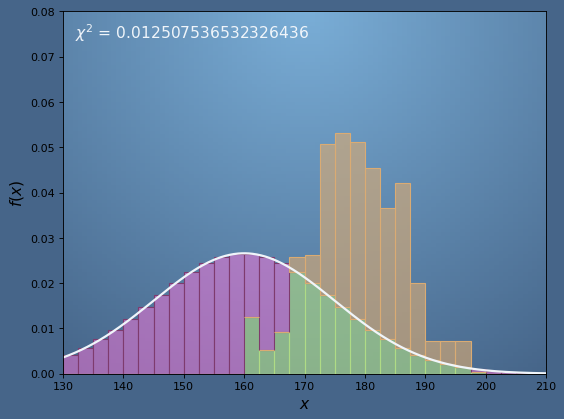

In [32]:
import matplotlib
matplotlib.use("nbAgg")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.5)
orangeTrans = (218/255, 171/255, 115/255, 0.625)
greenTrans = (175/255, 219/255, 133/255, 0.625)

blueMap = make_colormap([blue2, blue1])

def heights_data () :
    x = np.array([
    50, 52.5, 55, 57.5, # This row is padding
    60, 62.5, 65, 67.5, # This row is padding
    70, 72.5, 75, 77.5, # This row is padding
    80, 82.5, 85, 87.5, # This row is padding
    90, 92.5, 95, 97.5, # This row is padding
    100,102.5,105,107.5, # This row is padding
    110,112.5,115,117.5, # This row is padding
    120,122.5,125,127.5, # This row is padding
    130,132.5, # This row is padding
    135,137.5,140,142.5,145, # This row is padding
    147.5,150,152.5,155,157.5, # Also padding
    160,162.5,165,167.5,170,172.5,175,177.5,180,182.5,
    185,187.5,190,192.5,195,197.5,200,
    202.5,205,207.5, #Also padding
    210,212.5,215,217.5, # This row is padding
    220,222.5,225,227.5, # This row is padding
    230,232.5,235,237.5, # This row is padding
    240,242.5,245,247.5, # This row is padding
    250,252.5,255,257.5, # This row is padding
    260,262.5,265,267.5, # This row is padding
    270,272.5,275,277.5, # This row is padding
    280,282.5,285,287.5, # This row is padding
    290,292.5,295,297.5, # This row is padding
    ])
    width = x[1]-x[0]
    x = x + width / 2

    y = np.array([
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0.031,0.013,0.023,0.064,0.065,0.126,0.132,0.127,0.113,0.091,0.105,0.050,
    0.018,0.018,0.018,0.001,0,
    0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    ])
    y /= np.sum(y) * width
    
    return x, y

def histogram(f, p):
    μ, σ = p
    binCentre, hist = heights_data()
  
    width = binCentre[1]-binCentre[0]
    bins = binCentre - width / 2

    lineColour = white
    barColour = greenTrans
    barColourUnder = magentaTrans
    barColourOver = orangeTrans
    xmin=130
    xmax=210
    ymax = 0.08
    labelFontSize=13

    fig,ax = plt.subplots(figsize=(8, 6), dpi= 80, facecolor=blue1)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([0,ymax])
    
    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$f(x)$", fontsize=14)

    xs = np.arange(xmin, xmax, 0.1)
    f = lambda x,μ,σ: np.exp(-(x-μ)**2/(2*σ**2))/np.sqrt(2*np.pi)/σ

    fμ = lambda x: f(x, μ, σ)
    fμxs = fμ(xs)
  
    SSR = np.linalg.norm(f(binCentre,μ,σ)-hist)**2

    xx = np.arange(xmin,xmax,(xmax-xmin)/100)
    yy = np.arange(0,ymax,(ymax)/100)
    X, Y = np.meshgrid(xx, yy)
    Z = ( (X - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(Y - ymax)**2 )**0.5 /( (xmin - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(0 - ymax)**2 )**0.5
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[xmin, xmax, ymax, 0], cmap=blueMap)
    ax.set_aspect((xmax-xmin)/ymax / 1.333)
    
    histBelow = np.select([hist < fμ(binCentre)], [hist], fμ(binCentre))
    histAbove = np.abs(fμ(binCentre)-hist)
    histAbove1 = np.select([hist < fμ(binCentre)], [histAbove], 0)
    histAbove2 = np.select([hist >= fμ(binCentre)], [histAbove], 0)
    # The lines below are different from the code block. Here using 'bins' rather than 'binCentre'.
    ax.bar(binCentre, histBelow, width=width, color=barColour, edgecolor=green)
    ax.bar(binCentre, histAbove1, width=width, bottom=histBelow,
          color=barColourUnder, edgecolor=np.array(magenta)/2)
    ax.bar(binCentre, histAbove2, width=width, bottom=histBelow,
          color=barColourOver, edgecolor=orange)
    ax.plot(xs, fμxs, color=white, linewidth=2)

    ax.text(132, 0.074, "$\chi^2$ = " + str(SSR), fontsize=14, color=white)
    
    fig.show()

def contour(f, p) :
    binCentre, hist = heights_data()
    μmax = 200
    μmin = 150
    σmax = 35
    σmin = 2
    μs = np.arange(μmin,μmax+.5,.5)
    σs = np.arange(σmin,σmax+.5,.5)
    M, S = np.meshgrid(μs, σs)
    Z = ( (M - (μmax+μmin)/2)**2 + ((μmax-μmin)/σmax / 1.333)**2*(S - σmax)**2 )**0.5 /( (μmin - (μmax+μmin)/2)**2 + ((μmax-μmin)/σmax / 1.333)**2*(0 - σmax)**2 )**0.5

    fig,ax = plt.subplots(figsize=(8, 6), dpi= 80, facecolor=blue1)

    ax.set_xlim([μmin,μmax])
    ax.set_ylim([σmin,σmax])
    ax.set_aspect(1)

    ax.set_xlabel("$\mu / \mathrm{cm} $", fontsize=14)
    ax.set_ylabel("$\sigma / \mathrm{cm} $", fontsize=14)
    
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[μmin, μmax, σmax, σmin], cmap=blueMap)


    z = ((f(binCentre.reshape(binCentre.size,1,1),μs.reshape(1,μs.size,1),σs.reshape(1,1,σs.size)) - hist.reshape(hist.size,1,1))**2).sum(axis=0)
    ax.contour(np.outer(μs, np.ones_like(σs)),np.outer(np.ones_like(μs), σs),z,20, colors=[green], linewidths=1.5)

    ax.plot(p.T[0], p.T[1], 'o-', linewidth=2, color=magenta)
    ax.plot([p.T[0,-1]], [p.T[1,-1]], 'o-', linewidth=2, color=orange, markersize=8)
    plt.show()
    fig.show()
    
    
histogram(lambda x,mu,sig : np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig, [160, 15])

In [15]:
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# Next up, the derivative with respect to μ.
def dfdmu (x,mu,sig) :
    return f(x, mu, sig) * (2*(x - mu) / (2*sig**2))


def dfdsig (x,mu,sig) :
    # take the constants out, then apply product and chain derivative rules
    con = 1 / np.sqrt(2*np.pi)
    df_g = -np.exp(-(x-mu)**2 / (2*sig**2)) / sig**2
    f_dg = np.exp(-(x-mu)**2 / (2*sig**2)) * ((x-mu)**2 / sig**4)
    return con * (df_g + f_dg)

In [17]:
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig)
    ])
    step = -J * aggression
    return step

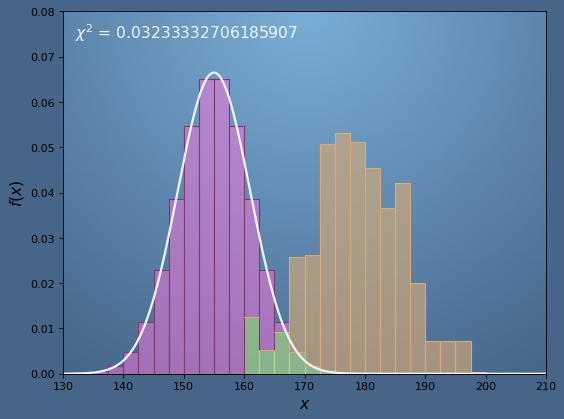

In [33]:
x,y = heights_data()

# Next we'll assign trial values for these.
mu = 155 ; sig = 6
# We'll keep a track of these so we can plot their evolution.
p = np.array([[mu, sig]])

# Plot the histogram for our parameter guess
histogram(f, [mu, sig])

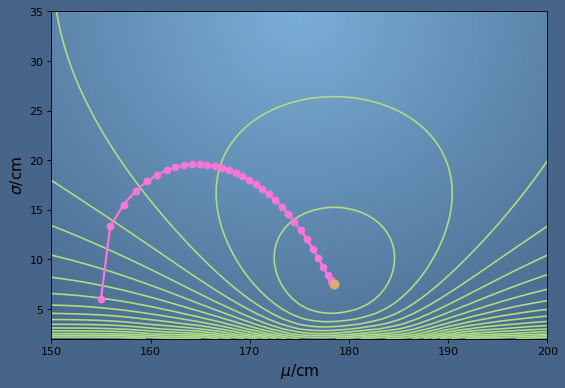

In [34]:

# Do a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
# Plot the path through parameter space.
contour(f, p)


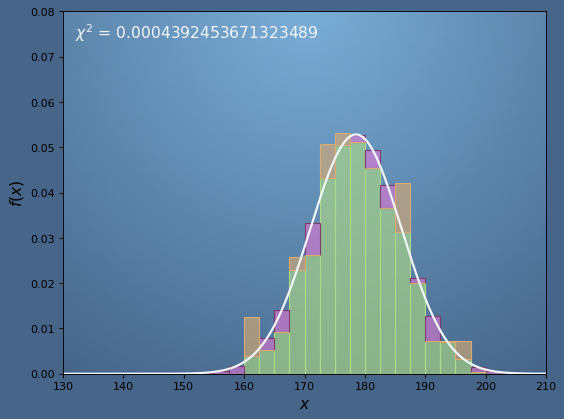

In [35]:
# Plot the final histogram.
histogram(f, [mu, sig])